<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-22 20:47:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  68.4MB/s    in 2.9s    

2025-04-22 20:47:12 (68.4 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 135.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 137.5 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

In [3]:

!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 140.9 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


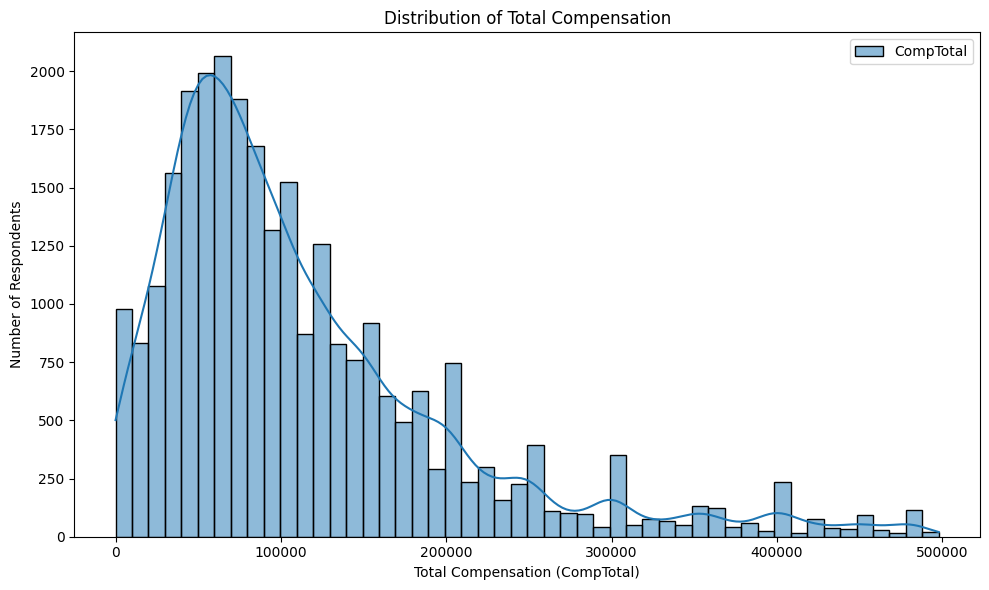

In [9]:
## Write your code here

query="""select CompTotal from main
         where CompTotal!='NA'"""
df_comp = pd.read_sql_query(query, conn)

# Optional: filter extreme outliers for better visualization (e.g., below $500k)
df_comp = df_comp[df_comp < 500000]

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_comp, bins=50, kde=True, color='teal')

# Labels and title
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Total Compensation')
plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


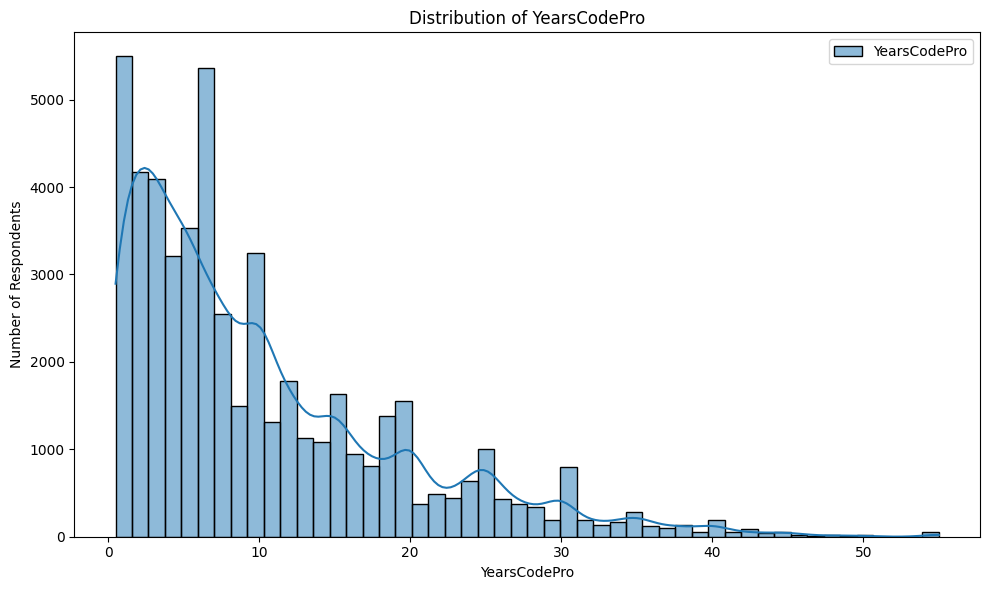

In [10]:
## Write your code here
query="""select (CASE TRIM(YearsCodePro)
        WHEN 'Less than 1 year' THEN 0.5 
        WHEN 'More than 50 years' THEN 55       
        ELSE YearsCodePro 
        END) YearsCodePro from main
        where YearsCodePro!='NA'"""
df_CodePro = pd.read_sql_query(query, conn)
df_CodePro['YearsCodePro'] = df_CodePro['YearsCodePro'].astype(float)


# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_CodePro, bins=50, kde=True, color='teal')

# Labels and title
plt.xlabel('YearsCodePro')
plt.ylabel('Number of Respondents')
plt.title('Distribution of YearsCodePro')
plt.tight_layout()
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


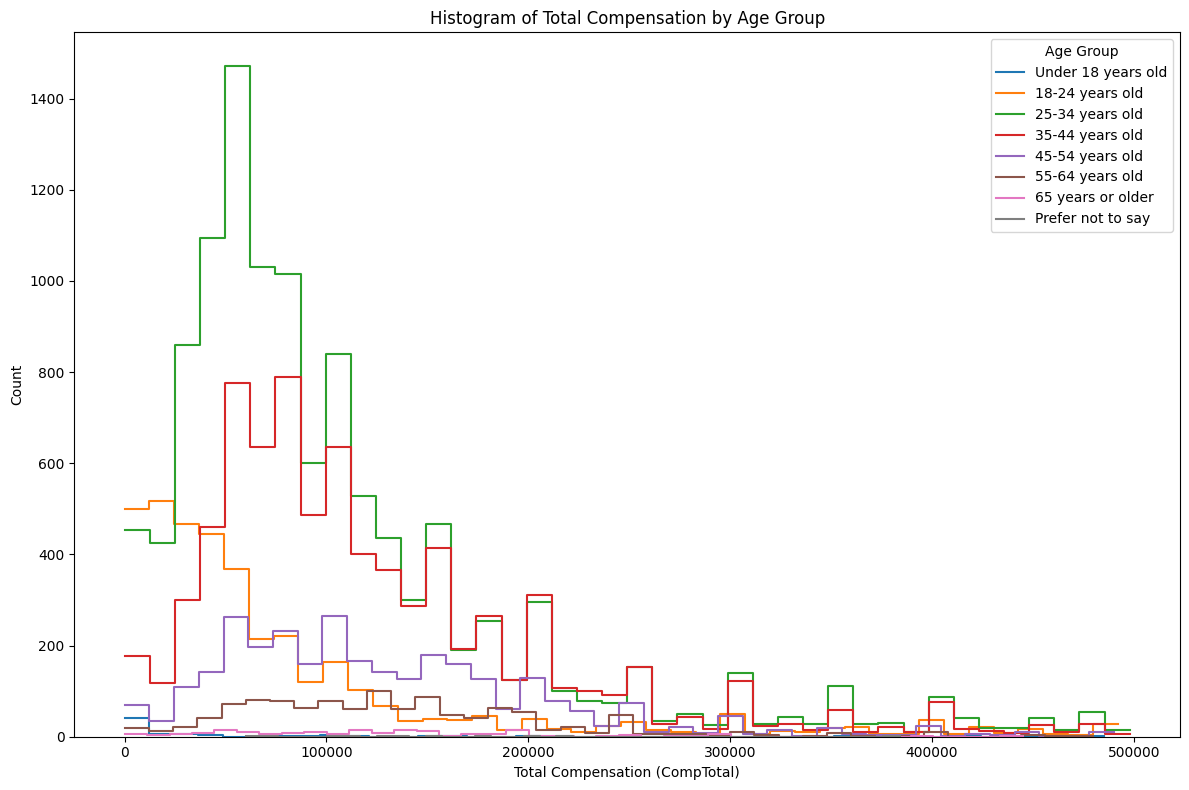

In [11]:
## Write your code here
query="""SELECT  
		CompTotal, Age
        FROM main  
        WHERE CompTotal!='NA' and age!='NA'"""
df_age_comp = pd.read_sql_query(query, conn)

df_age_comp = df_age_comp[df_age_comp['CompTotal'] < 500000]

#  Set up the plot
plt.figure(figsize=(12, 8))

#  Plot histogram for each Age group
age_groups = df_age_comp['Age'].unique()

# You can choose specific age groups or sort
selected_ages = ['Under 18 years old','18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old','65 years or older','Prefer not to say']

for age in selected_ages:
    subset = df_age_comp[df_age_comp['Age'] == age]
    sns.histplot(subset['CompTotal'], bins=40, label=age, kde=False, element='step', fill=False)

# Final touches
plt.title('Histogram of Total Compensation by Age Group')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


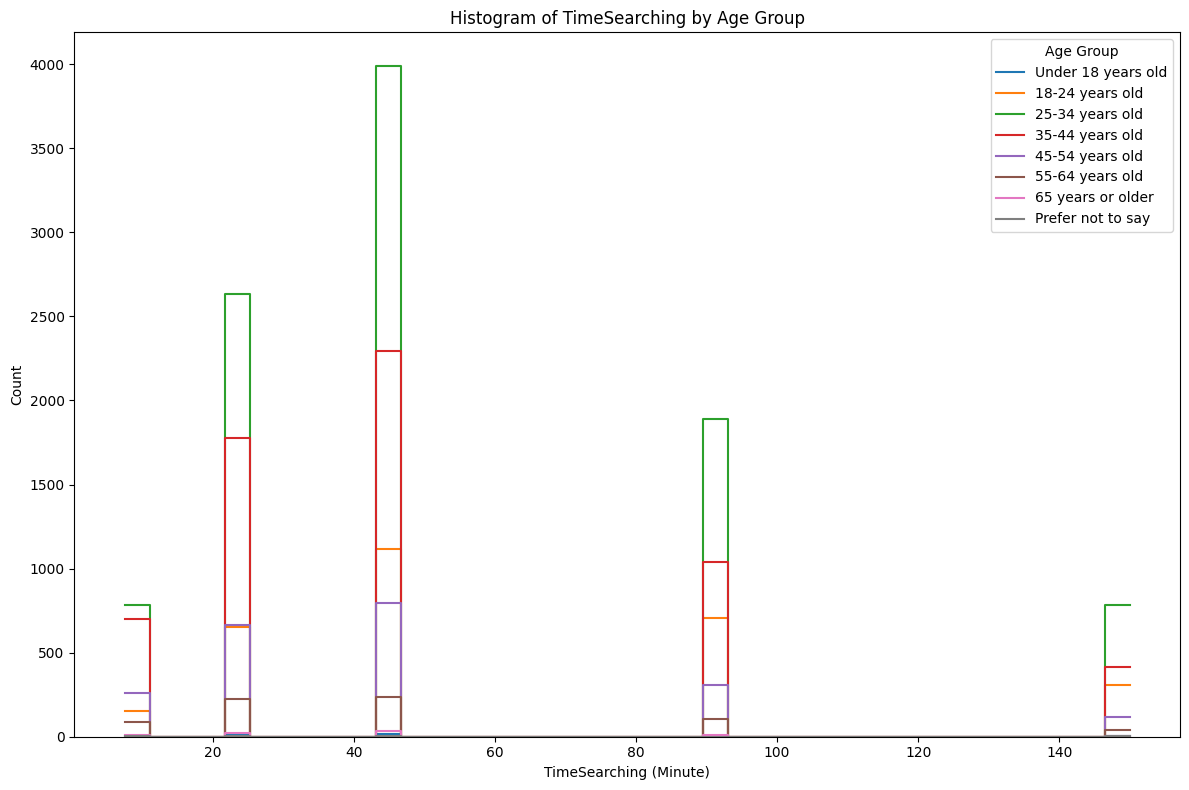

In [12]:
## Write your code here
query="""SELECT  
		(CASE TRIM(TimeSearching)
        WHEN 'Less than 15 minutes a day' THEN 7.5 
        WHEN '15-30 minutes a day' THEN 22.5 
        WHEN '30-60 minutes a day' THEN 45 
        WHEN '60-120 minutes a day' THEN 90 
        WHEN 'Over 120 minutes a day' THEN 150 
        ELSE null 
        END )TimeSearching, Age
        FROM main  
        WHERE CompTotal!='NA' and age!='NA'"""
df_age_timeSearching = pd.read_sql_query(query, conn)
df_age_timeSearching['TimeSearching'] = df_age_timeSearching['TimeSearching'].astype(float)
#df_age_timeSearching = df_age_timeSearching[df_age_timeSearching['TimeSearching'] < 500000]

#  Set up the plot
plt.figure(figsize=(12, 8))

#  Plot histogram for each Age group
age_groups = df_age_timeSearching['Age'].unique()

# You can choose specific age groups or sort
selected_ages = ['Under 18 years old','18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old','65 years or older','Prefer not to say']

for age in selected_ages:
    subset = df_age_timeSearching[df_age_timeSearching['Age'] == age]
    sns.histplot(subset['TimeSearching'], bins=40, label=age, kde=False, element='step', fill=False)

# Final touches
plt.title('Histogram of TimeSearching by Age Group')
plt.xlabel('TimeSearching (Minute)')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


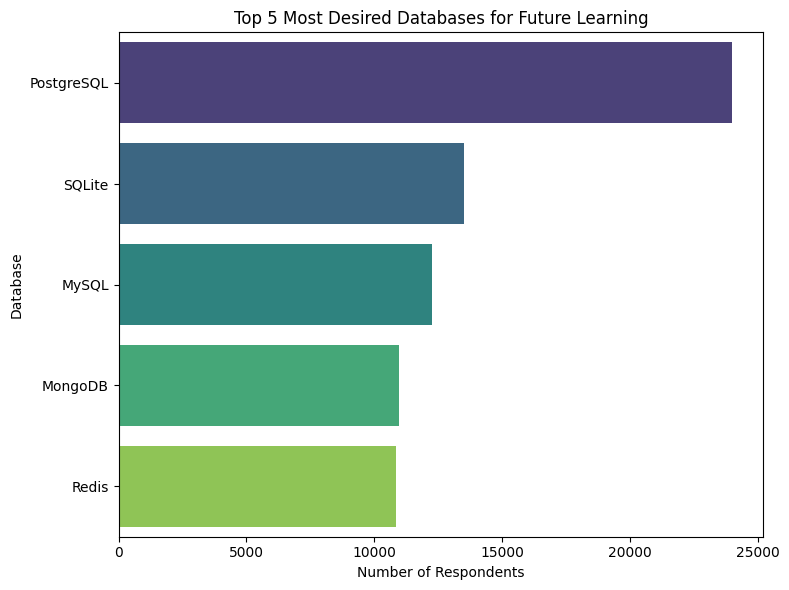

In [13]:
## Write your code here
query = """SELECT DatabaseWantToWorkWith from main
            where DatabaseWantToWorkWith!='NA'"""
df = pd.read_sql_query(query, conn)

# Drop missing values and split multiple selections
db_list = df['DatabaseWantToWorkWith'].str.split(';').sum()

db_counter = Counter(db_list)

# Step 3: Get the top 5 most wanted databases
top_5_db = db_counter.most_common(5)
labels, values = zip(*top_5_db)

# Step 4: Plot the histogram
plt.figure(figsize=(8, 6))
sns.barplot(x=list(values), y=list(labels),hue=list(labels) , palette="viridis")

# Step 5: Add titles and labels
plt.title("Top 5 Most Desired Databases for Future Learning")
plt.xlabel("Number of Respondents")
plt.ylabel("Database")
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


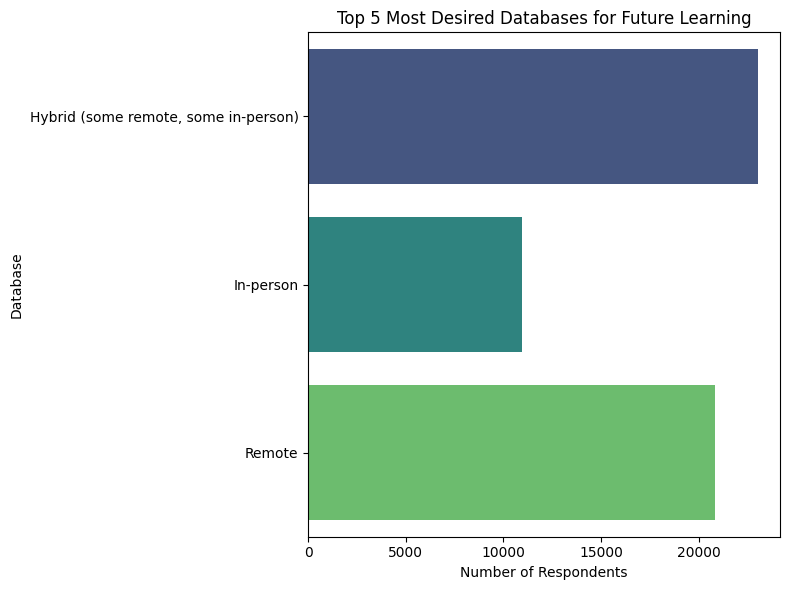

In [14]:
## Write your code here
query = """select RemoteWork, count(*)as cnt 
            from main
            where RemoteWork!='NA'
            group by RemoteWork"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(8, 6))
sns.barplot(x=df['cnt'], y=df['RemoteWork'],hue=df['RemoteWork'] , palette="viridis")

plt.title("Top 5 Most Desired Databases for Future Learning")
plt.xlabel("Number of Respondents")
plt.ylabel("Database")
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


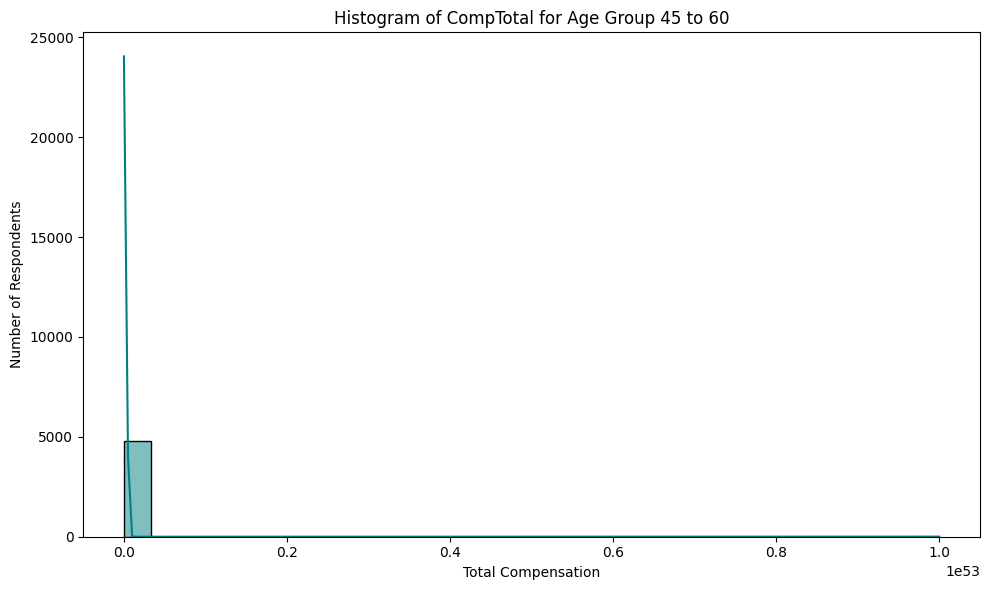

In [15]:
## Write your code here
# Step 1: Map Age to midpoint numeric values
query="""SELECT  CompTotal,
        (CASE TRIM(Age)
        WHEN 'Under 18 years old' THEN 15 
        WHEN '18-24 years old' THEN 21 
        WHEN '25-34 years old' THEN 29 
        WHEN '35-44 years old' THEN 39 
        WHEN '45-54 years old' THEN 49 
        WHEN '55-64 years old' THEN 59 
        WHEN '65 years or older' THEN 70 
        WHEN 'Prefer not to say' THEN null
        ELSE null 
        END ) Age
        FROM main  
        WHERE CompTotal!='NA' 
        and age in ('45-54 years old','55-64 years old') 
        and age!='NA'"""
df = pd.read_sql_query(query, conn)

comp_values = df['CompTotal']

plt.figure(figsize=(10, 6))
sns.histplot(comp_values, bins=30, kde=True, color='teal')

plt.title('Histogram of CompTotal for Age Group 45 to 60')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


/tmp/ipykernel_300/2115107863.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Experience Range')


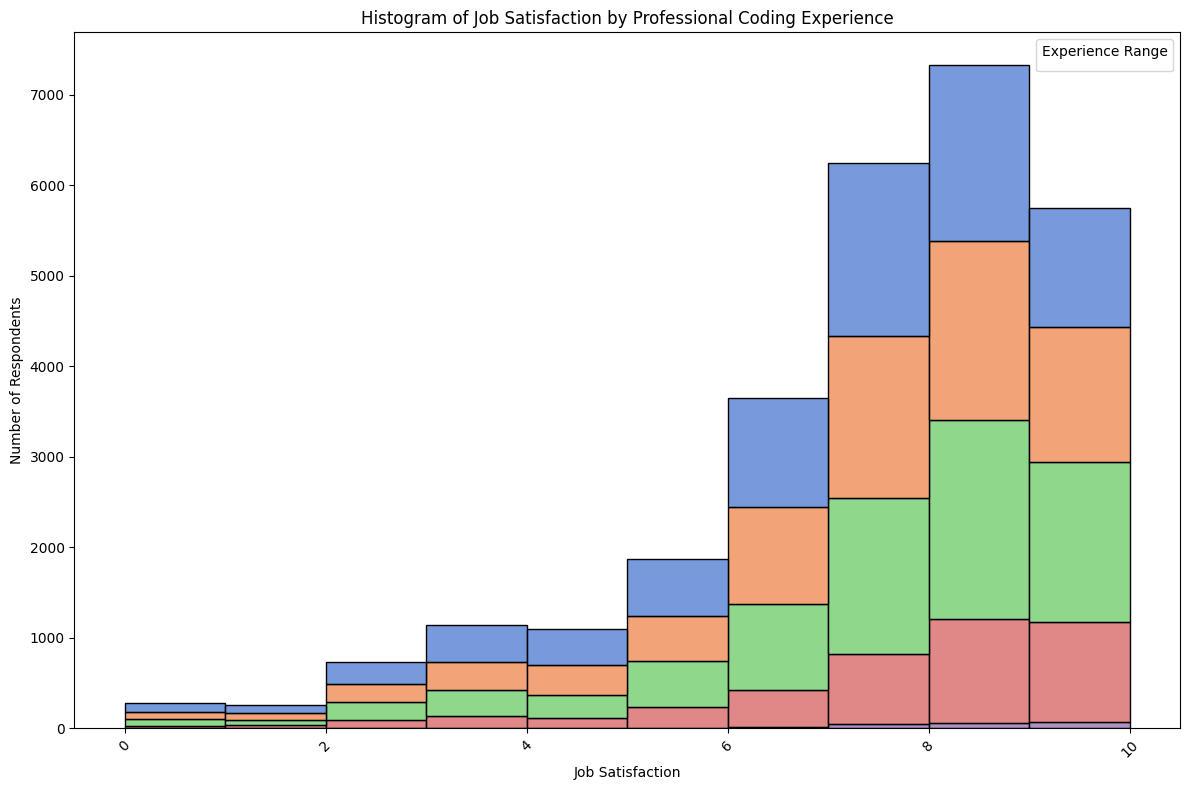

In [20]:
## Write your code here

query="""
        select (CASE TRIM(YearsCodePro)
        WHEN 'Less than 1 year' THEN 0.5 
        WHEN 'More than 50 years' THEN 55       
        ELSE YearsCodePro 
        END) YearsCodePro,JobSat  from main
        where YearsCodePro!='NA' and JobSat!='NA'
        """
df = pd.read_sql_query(query, conn)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
#df_exp = df[['YearsCodePro', 'JobSat']].dropna()

# Step 3: Define experience bins
bins = [0, 5, 10, 20, 40, 100]
labels = ['0-5 yrs', '6-10 yrs', '11-20 yrs', '21-40 yrs', '40+ yrs']
df_exp['ExperienceRange'] = pd.cut(df_exp['YearsCodePro'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 8))
sns.histplot(data=df_exp, x='JobSat', hue='ExperienceRange', multiple='stack', palette='muted', bins=10)

plt.title('Histogram of Job Satisfaction by Professional Coding Experience')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Experience Range')
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
